#Clasificación de cáncer de seno usando subclassing

En este cuaderno se reescribe el código propuesto para clasificación de cáncer de seno usando subclassing de Keras.

El conjunto de datos empleado corresponde a casos tumores de seno, de los cuales 357 resultaro beningnos y 212 malignos. Se cuenta con 10 características que serán empleadas para determinar la probabilidad de que un tumor sea cancerigeno.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

El conjunto de datos fue descargado de [kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

ruta='gdrive/My Drive/Maestría/Inteligencia Artificial/'

Mounted at /content/gdrive


In [3]:
data = pd.read_csv(ruta+"Cancer_data.csv")
del data['Unnamed: 32']

Se generan los conjuntos de variables explicativas y variables de respuesta.

In [4]:
x = data.iloc[:,2:].values
y = data.iloc[:,1].values

In [5]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

Se genera el conjunto de prueba y entrenamiento usando una semilla aleatoria para garantizar la replicabilidad.

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 12)

Para la regresión se normalizan los datos.

In [7]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Se usa subclassing para la regresión, por lo que se establece una capa densa y un dropout en cada caso. Se permite modificar el número de conexiones en cada capa densa y el porcentaje de dropout en cada paso.

In [8]:
class Block(layers.Layer):
  def __init__(self, out_channels,activation,drop):
    super(Block, self).__init__()
    self.dens = layers.Dense(out_channels,activation,input_shape=(30,))
    self.drop = layers.Dropout(drop)
    

  def call(self, input_tensor):
    x = self.dens(input_tensor)
    x = tf.nn.relu(x)
    return x

Se establece el modelo de clasificación

In [9]:
classifier = tf.keras.Sequential(
    [
     Block(16,"relu",0.1),
     Block(16,"relu",0.1),
     layers.Dense(1,activation='sigmoid')
    ]
)


In [10]:
classifier.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ["accuracy"]
)

In [11]:
history = classifier.fit(x_train, y_train, batch_size=32, epochs=80,validation_split = 0.2)

Epoch 1/80
13/13 [==============================] - 3s 53ms/step - loss: 0.6458 - accuracy: 0.5917 - val_loss: 0.5545 - val_accuracy: 0.7573
Epoch 2/80
13/13 [==============================] - 0s 12ms/step - loss: 0.5102 - accuracy: 0.8142 - val_loss: 0.4440 - val_accuracy: 0.9126
Epoch 3/80
13/13 [==============================] - 0s 11ms/step - loss: 0.4043 - accuracy: 0.8924 - val_loss: 0.3497 - val_accuracy: 0.9515
Epoch 4/80
13/13 [==============================] - 0s 12ms/step - loss: 0.3156 - accuracy: 0.9242 - val_loss: 0.2728 - val_accuracy: 0.9515
Epoch 5/80
13/13 [==============================] - 0s 11ms/step - loss: 0.2468 - accuracy: 0.9389 - val_loss: 0.2160 - val_accuracy: 0.9417
Epoch 6/80
13/13 [==============================] - 0s 8ms/step - loss: 0.1969 - accuracy: 0.9535 - val_loss: 0.1779 - val_accuracy: 0.9417
Epoch 7/80
13/13 [==============================] - 0s 15ms/step - loss: 0.1629 - accuracy: 0.9560 - val_loss: 0.1526 - val_accuracy: 0.9417
Epoch 8/80
13/

A continuación se prueba el modelo




In [12]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
#y_pred = (y_pred > 0.5)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <=0.5] = 0

In [13]:
cm = confusion_matrix(y_test, y_pred)

In [14]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/y_test.shape[0])*100))

Our accuracy is 98.24561403508771%


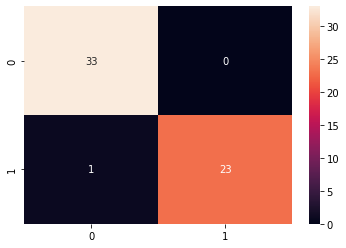

In [15]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [16]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

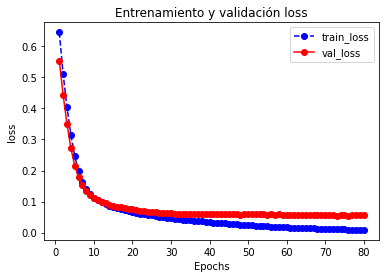

In [17]:
plot_metric(history, 'loss')

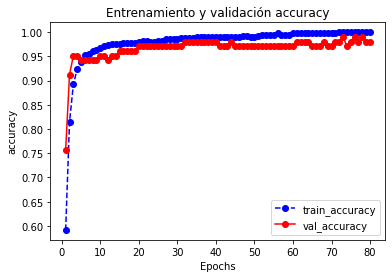

In [18]:
plot_metric(history, 'accuracy')

Se puede ver que el modelo se ajusta correctamente y el poder predictivo es alto